# The Boston Housing Dataset
### Machine Learning and Statistics Assessment 2019
#### Due November 29th 2019
#### Simon McLain G00364775
### Introduction to the Boston Dataset
The Boston house-price was utilised by David Harrison Jr. and Daniel L. Rubinfeld in their paper "Hedonic Housing Prices and the Demand for Clean Air" published in the Journal of Environmental Economics and Management 5, pg. 82-102 in 1978. Their purpose was to derive an equation to express the willingness to pay more for housing if buyers or renters percieve improved air quality. The dataset containing 506 data points for 13 numeric/ categorical predictive attributes was used to identify price factors according to the premises internal and external characteristics affecting it. The fourteenth attritbute "Medium Value" is the dependent variable, their hypothesis being that the numeric/ categorical attributes within the dataset could be used to predict the "Medium Value" of housing. 

A link to their full article in provided in the references section along with blogs visited while conducting this assignment.  

The dataset, now commonly referred to the Boston Housing Dataset is often used machine learning blogs and papers to discuss regression analysis

![title](pic.jpg)
##### The image is released free of copyrights under Creative Commons CC0


## Import Libraries 

In [1]:
# Import libraries for analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from scipy import stats
import keras as kr
%matplotlib inline

# Hide warnings to improve readibility
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


## Load the Boston dataset

In [2]:
# Import Boston Housing dataset from SciKit Learn
from sklearn.datasets import load_boston
dataset = load_boston()

In [3]:
# discover the keys for the dataset
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
# Convert the dataset to a pandas dataframe
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [5]:
# Add a new column to the dataframe for Median Values of housing
df['MEDV'] = dataset.target

# Describe

In [6]:
# Description of the Boston Housing dataset
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

We begin the statistical analysis by understanding the distribution of Median Housing Values [MEDV] In the distribution plot below housing values display a positive skew, where the right hand tail is longer than the left hand tail. 

In [7]:
# Average Median Value of Housing
x = df.loc[:,"MEDV"].mean()
print("The Median Housing Value in the dataset is: ", round(x, 2))

The Median Housing Value in the dataset is:  22.53


In [8]:
print("Table 1. Full Descriptive Statistics")
df.describe().round(2)

Table 1. Full Descriptive Statistics


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


#### Plot 1
A histogram showing the distribution of median values of housing within the Boston dataset

Text(0.5, 0, 'Median House Value')

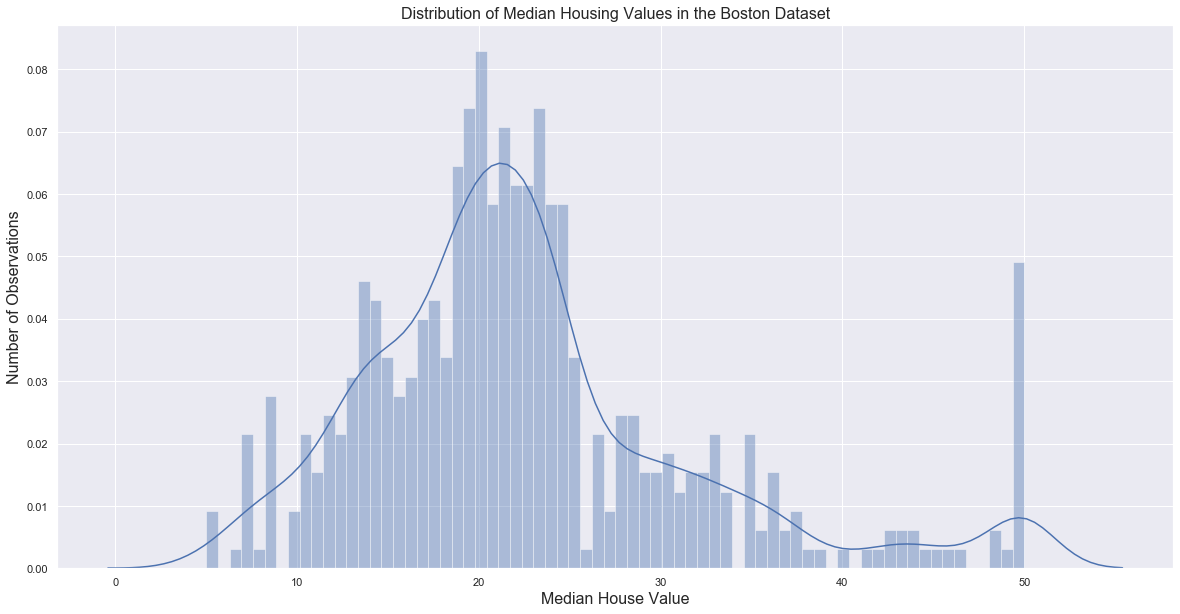

In [9]:
sns.set(rc={'figure.figsize':(20,10)})
x = pd.Series(df['MEDV'])
ax = sns.distplot(x, bins=70, color='b')
plt.title('Distribution of Median Housing Values in the Boston Dataset', fontsize=16)
plt.ylabel('Number of Observations', fontsize=16)
plt.xlabel('Median House Value', fontsize=16)

#### Plot 2

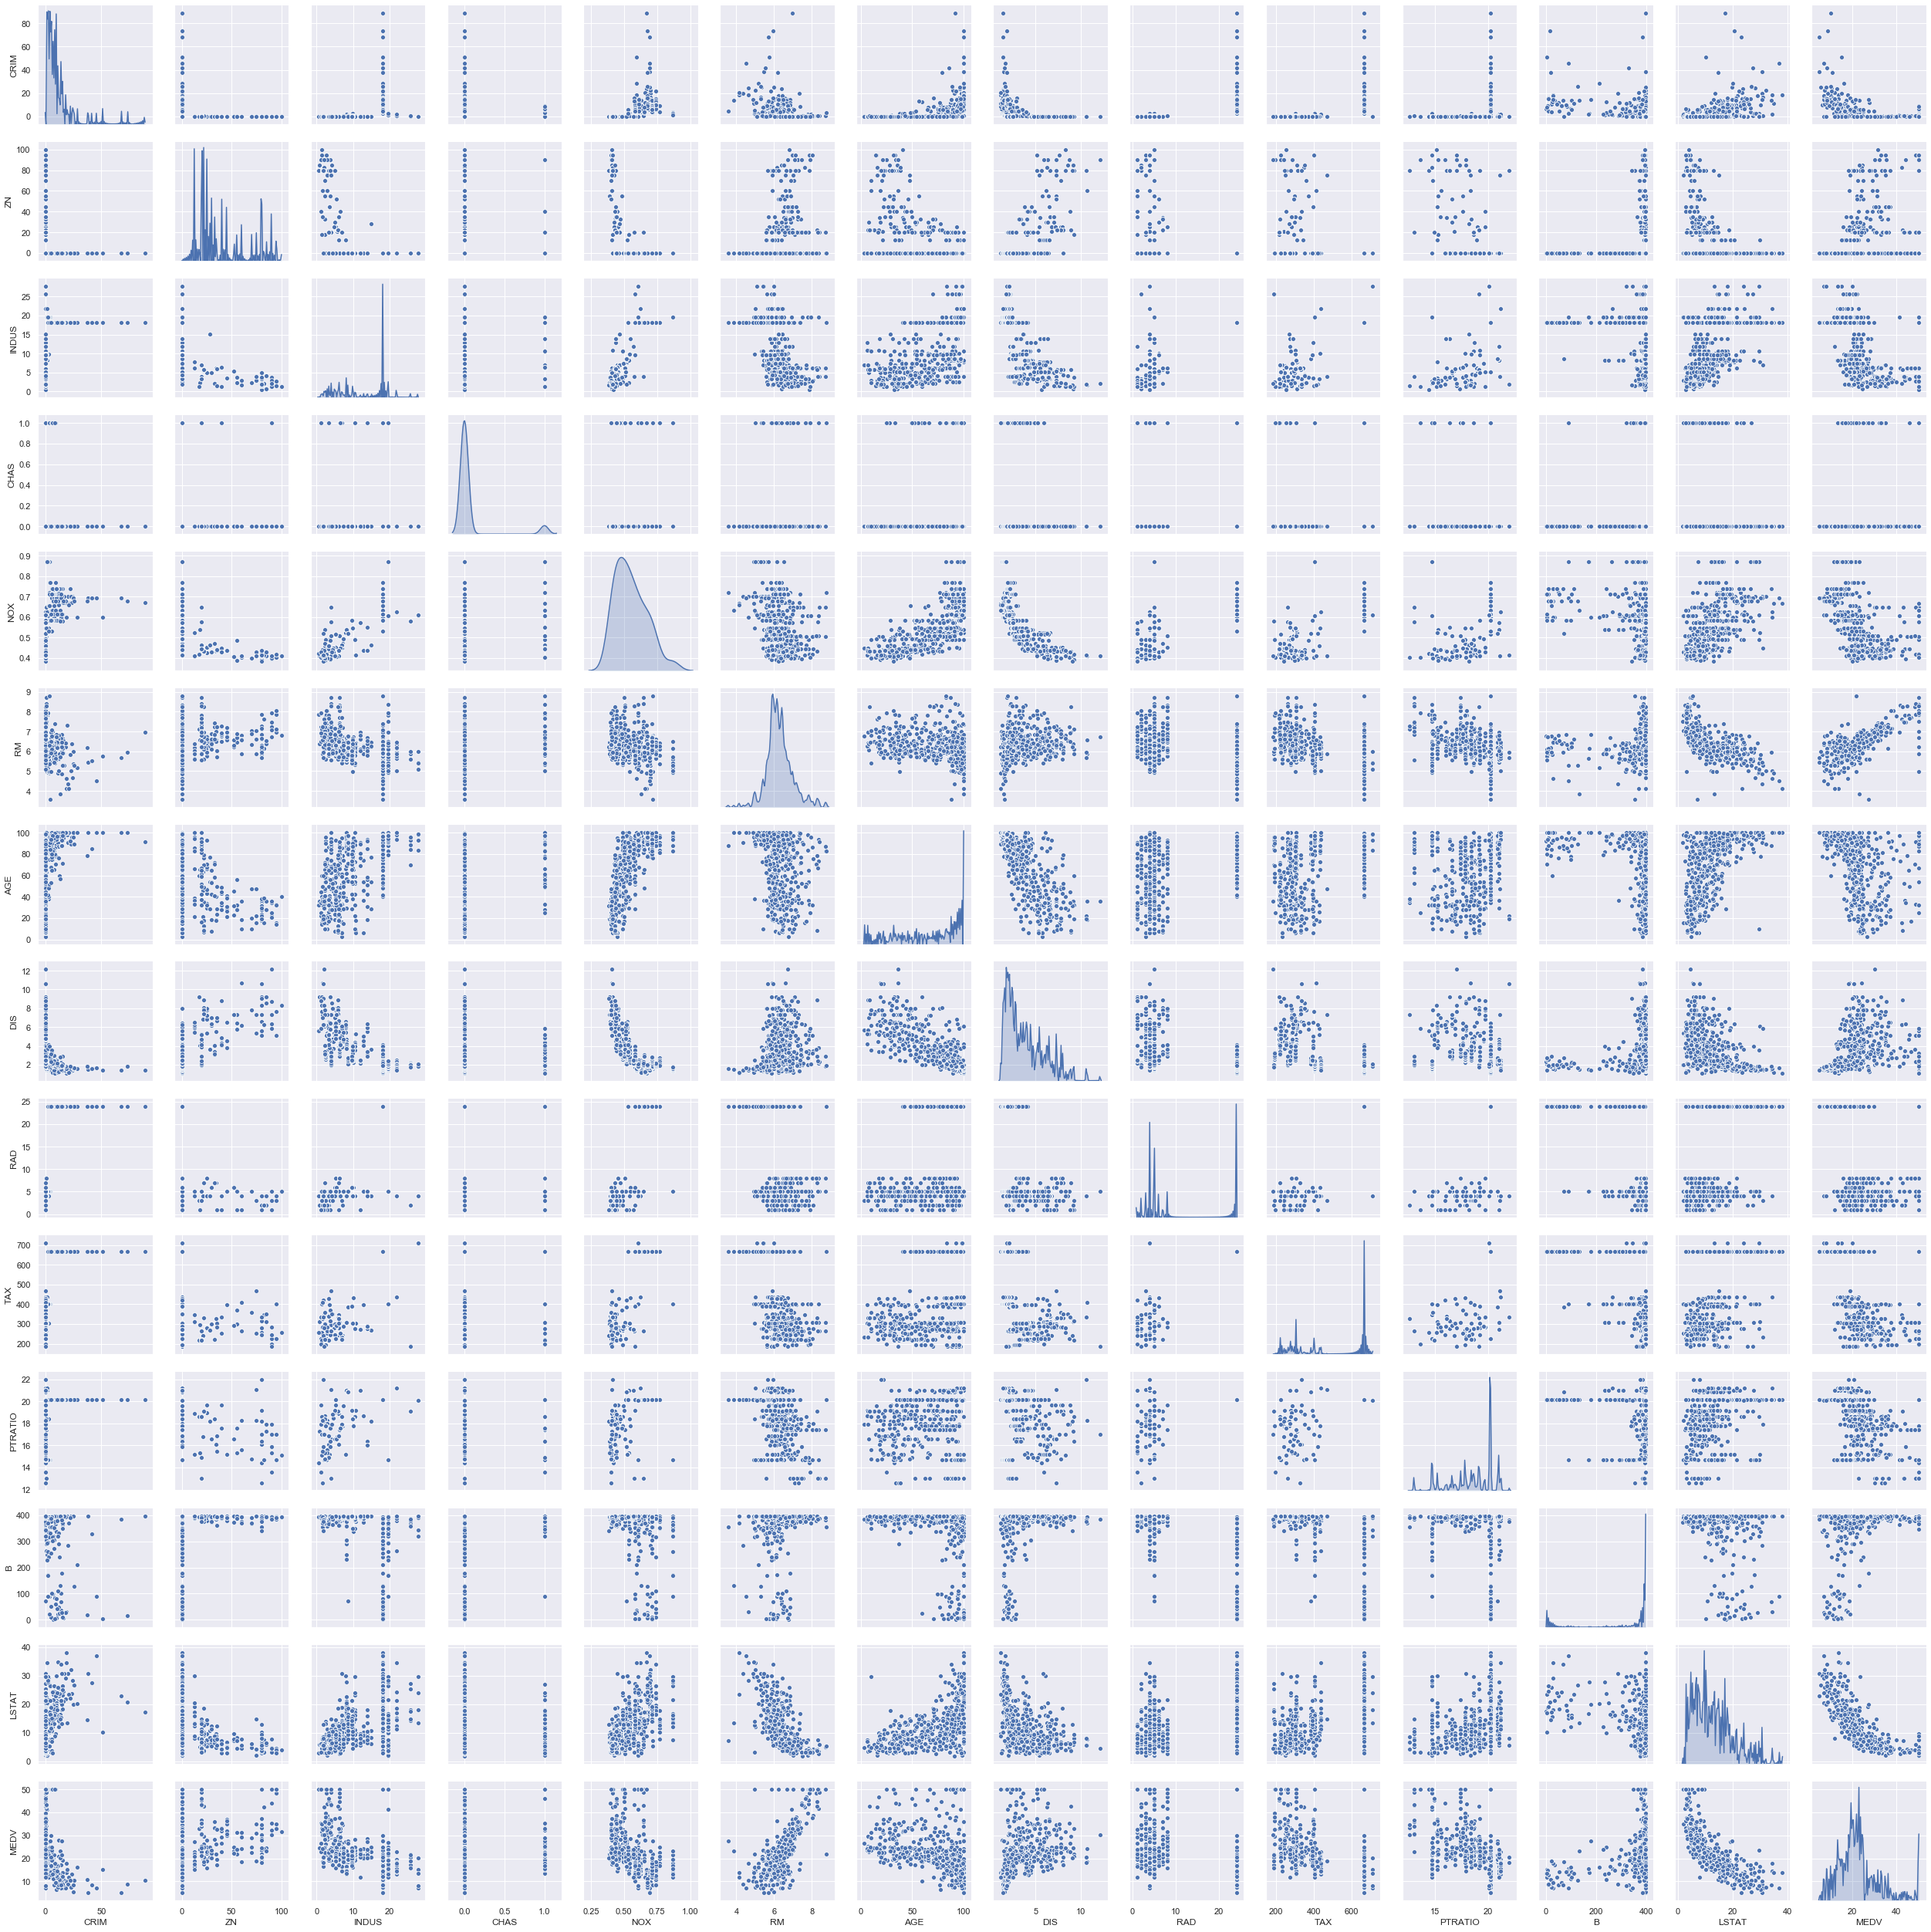

In [10]:
sns.pairplot(df, diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False) )

# Infer

## Is there a significant difference in median house prices between houses along the Charles river and those that aren't?
![title](CHAS.jpg)

###### A watercolor illustration made for the Esplanade Association.FRANK COSTANTINO
###### https://www.bostonglobe.com/arts/2012/03/04/make-better-esplanade-harness-citizens-passion/Z8hyWWzjJbJ9vCcvvyNaiM/story.html

### Summary
Several Statisical Analysis Techniques were used to determine the probablity of there being no significant difference between the median value of houses along the Charles river and those house that where not, (i.e. the null hypothesis). If the probablity that the two groups are samples from the same population is less than 0.05 then the null hypothesis can be rejected and the conclusion made that, based on the available observations, that there **is** a significant difference between the median value of houses. 

The conclusion using a variety of statistical techniques for cross-validation is that there is a statistical difference in median values for houses located on the Charles river and houses not located on the Charles river based on the observations within this dataset. 


Let's begin with some descriptive statistics. The plot below tells us that significantly fewer houses in the dataset are located along the Charles river, 35 versus 471. Houses not along the Charles river seem to follow a positively skewed normal distribution with a positive skew. The plot for houses along the Charles river is not very informative.

Some deeper statistical analysis would be beneficial. 

#### Descriptive Statistics
It is clear that housing along the Charles river (MEDV_river in Table 2) have a higher mean value and a greater proportion of housing in the 3rd quartile than housing not along the Charles river (MEDV_no_river in Table 2)

In [11]:
# Slice CHAS column according to boolean values. 1 = along river, 0 = not along river
river_stats = df[df['CHAS']==1].describe()
river_stats.rename(columns=lambda x:x+'_river',inplace=True) 
no_river_stats = df[df['CHAS']==0].describe()
no_river_stats.rename(columns=lambda x:x+'_no_river',inplace=True) 
# create a new array containing 
statistics = pd.concat([river_stats, no_river_stats], axis=1)

In [12]:
desc = statistics.loc[:, ['MEDV_river', 'MEDV_no_river']]
print("Table 2. Descriptive statistics for MEDV according to CHAS")
desc

Table 2. Descriptive statistics for MEDV according to CHAS


,MEDV_river,MEDV_no_river
count,35.000000,471.000000
mean,28.440000,22.093843
std,11.816643,8.831362
min,13.400000,5.000000
25%,21.100000,16.600000
50%,23.300000,20.900000
75%,33.150000,24.800000
max,50.000000,50.000000


#### Plot 3
Histograms showing the distribution of Median values for houses on the Charles river (CHAS) and houses not on the Charles river (Non_CHAS)

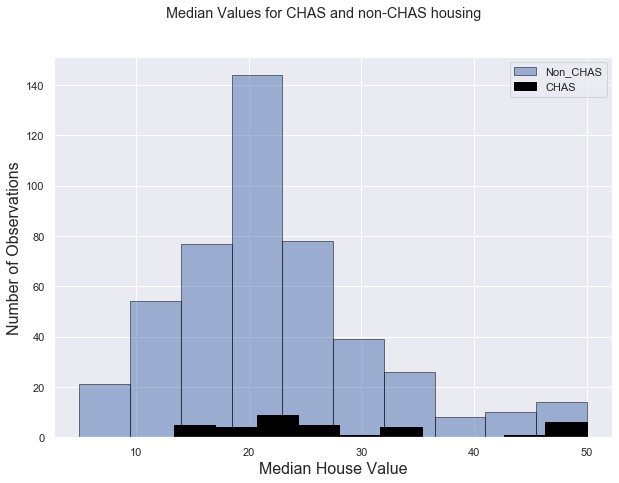

In [13]:
fig = plt.figure()
fig.suptitle('Median Values for CHAS and non-CHAS housing')
df[df['CHAS']==0].MEDV.plot(kind='hist',color='b',edgecolor='black',alpha=0.5,figsize=(10,7))
df[df['CHAS']==1].MEDV.plot(kind='hist',color='black',edgecolor='black', figsize=(10,7))
L = plt.legend()
L.get_texts()[0].set_text('Non_CHAS')
L.get_texts()[1].set_text('CHAS')
plt.ylabel('Number of Observations', fontsize=16)
plt.xlabel('Median House Value', fontsize=16)
plt.show()

#### Plot 4
Boxplots help us to visualise the distribution of Median housing values in the two samples. We can see that housing along the Charles river has a higher median value, as well as a greater spread or standard deviation from the mean value. Housing not along the Charles river has a small spread in values but a greater number of outliers. The boxplot is useful in visualising the data, however based solely on this data the Charles river housing could reasonably be argued to be within the range of outliers for houses not on the Charles river. 

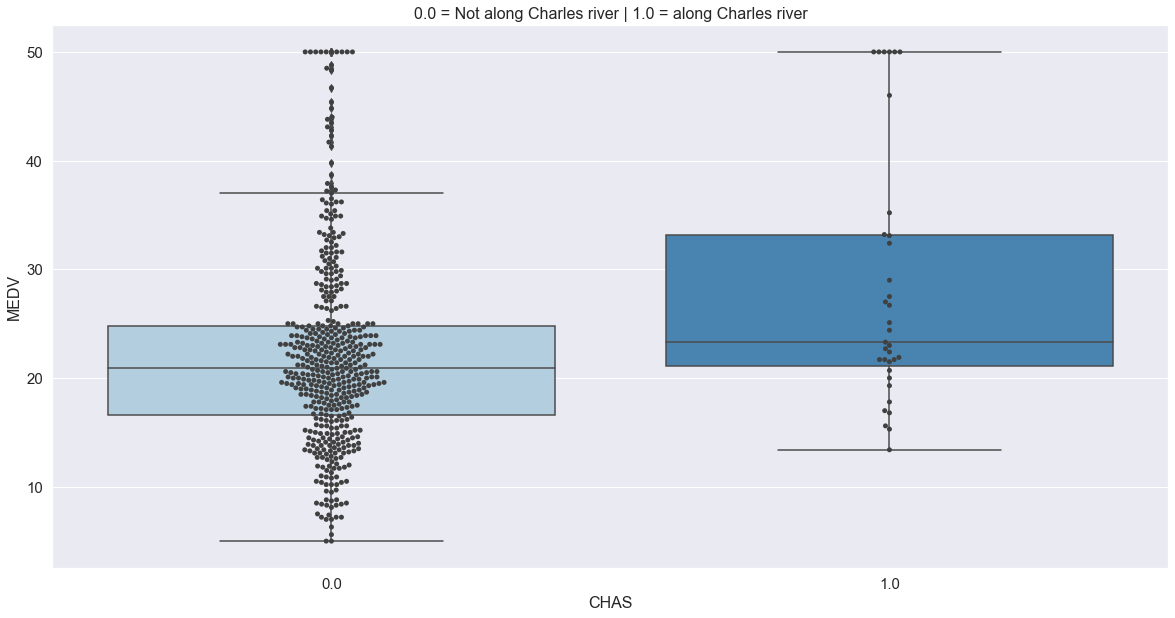

In [14]:
ax = sns.boxplot(x="CHAS", y="MEDV", data=df, palette="Blues")
ax.axes.set_title("0.0 = Not along Charles river | 1.0 = along Charles river",fontsize=16)
ax.set_xlabel("CHAS",fontsize=16)
ax.set_ylabel("MEDV",fontsize=16)
ax.tick_params(labelsize=15)
ax = sns.swarmplot(x="CHAS", y="MEDV", data=df, color=".25")
plt.show()

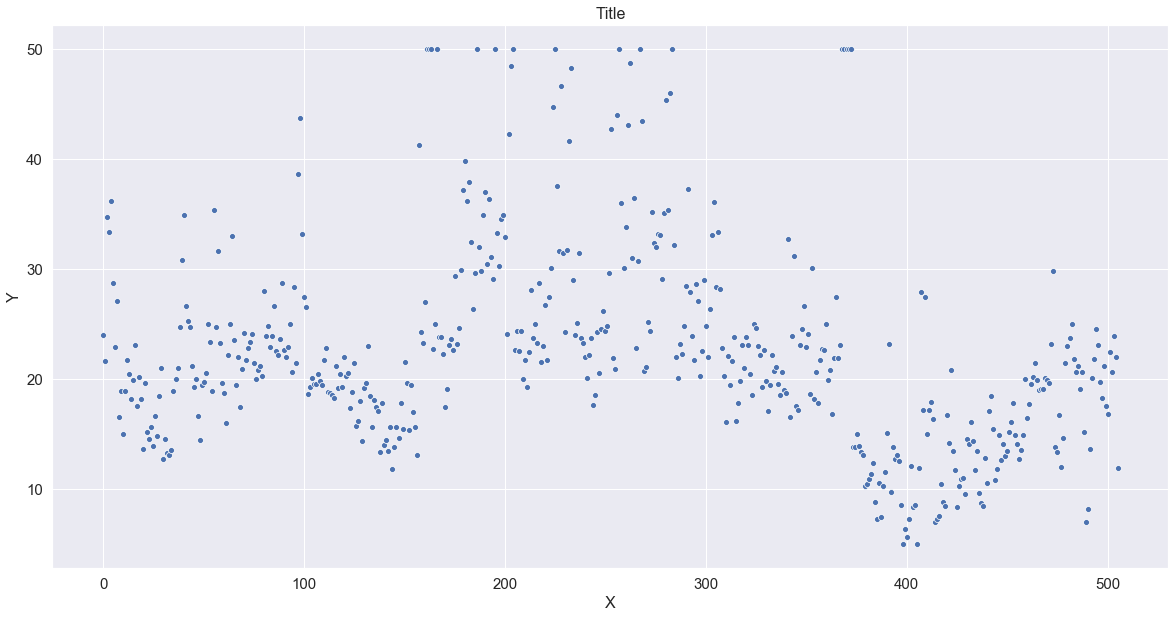

In [15]:
x = df['MEDV']
p = sns.scatterplot(range(len(x)), x, palette="Blues")
p.axes.set_title("Title",fontsize=16)
p.set_xlabel("X",fontsize=16)
p.set_ylabel("Y",fontsize=16)
p.tick_params(labelsize=15)
plt.show()

#### t-test
The t-test compares the means of the Median Values for houses along the Charles river and those not along the Charles river to evaluate whether their means are statistically different from each other. Below an independent t-test is performed as both groups can be considered independent from each other. 

A pvalue of >0.05 allows us to reject the null hypothesis. According to the t-test the likelihood of both same being from within the same poplulation is 0.0036. The t-test assumes normally distributed samples, as we can see from the histogram in **Plot 3** both the groups have positive skew, with tail's and outliers extending to the right.

In [16]:
stats.ttest_ind(df['MEDV'][df['CHAS']==1], df['MEDV'][df['CHAS']==0], equal_var=False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

#### ANOVA
Analysis of Variance (ANOVA) is another inferential statistical technique we can use to analyse whether there is a significant difference median house prices between houses that are along the Charles river and those that are not. 

ANOVA looks at the variation between the groups, and the variation within groups. It is normally used to compare means among more than two-groups. We use it here as a second point of reference since there is strong overlap between the two groups of housing types. 

In [17]:
stats.f_oneway(df['MEDV'][df['CHAS']==1], df['MEDV'][df['CHAS']==0])

F_onewayResult(statistic=15.971512420371962, pvalue=7.390623170520815e-05)

#### Ordinary Least Squares
We can use the OLS package in statsmodels to do a thorough statistical analyis to complement the t-test and ANOVA. OLS not as complex as more advanced statistical models, it is quite rigid and does not reflect the true relationship. However it is easier to interpret than more sophisticated models. 

Linear regression of the independent variables is used to predict the dependent variable. 


In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
results = ols('MEDV ~ C(CHAS)', data=df).fit()
print("Table 3")
results.summary()

Table 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           7.39e-05
Time:                        21:13:47   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         22.0938      0.418     52.902      0.000      21.273      22.914
C(CHAS)[T.1.0]     6.3462      1.588      3.996      0.000       3.226       9.466
==============================================================================
Omnibus:                       81.923   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.534
Skew:                           1.043   Prob(JB):                     5.50e-28
Kurtosis:                       4.267   Cond. No.                         3.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(CHAS),1312.079271,1.0,15.971512,0.000074
Residual,41404.216144,504.0,NaN,NaN


In [20]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(CHAS),1312.079271,1.0,1312.079271,15.971512,0.000074,0.030716,0.028738
Residual,41404.216144,504.0,82.151223,NaN,NaN,NaN,NaN


In [21]:
results.diagn

{'jb': 125.53381806638227,
 'jbpv': 5.50399157894757e-28,
 'skew': 1.0428369369065968,
 'kurtosis': 4.266545570049646,
 'omni': 81.92280136133049,
 'omnipv': 1.624387778706191e-18,
 'condno': 3.9611425816000603,
 'mineigval': 32.41335610748762}

# Predict
![title](predict.jpg)
##### Ms Marvel (Carol Danvers) the Boston based Superhero with pre-cognative "seventh sense" powers
##### Copyright https://www.marvel.com/characters/captain-marvel-carol-danvers/in-comics 

In [22]:
# drop columns where the attributes express multi=colinearity. Refer to separate notebook for analysis
boston = df.drop(columns=['PTRATIO', 'NOX', 'TAX', 'RM', 'AGE', 'B', 'INDUS'])

In [23]:
boston.head()

,CRIM,ZN,CHAS,DIS,RAD,LSTAT,MEDV
0,0.00632,18.0,0.0,4.0900,1.0,4.98,24.0
1,0.02731,0.0,0.0,4.9671,2.0,9.14,21.6
2,0.02729,0.0,0.0,4.9671,2.0,4.03,34.7
3,0.03237,0.0,0.0,6.0622,3.0,2.94,33.4
4,0.06905,0.0,0.0,6.0622,3.0,5.33,36.2


### Drop columns that have a high multi-colinearity

- Dropping PTRATIO with vif=85.02954731061801
- Dropping NOX with vif=73.89417092973886
- Dropping TAX with vif=57.72034668372636
- Dropping RM with vif=39.069063497543915
- Dropping AGE with vif=14.000757811090512
- Dropping B with vif=10.074224239820206
- Dropping INDUS with vif=6.9000773644875855

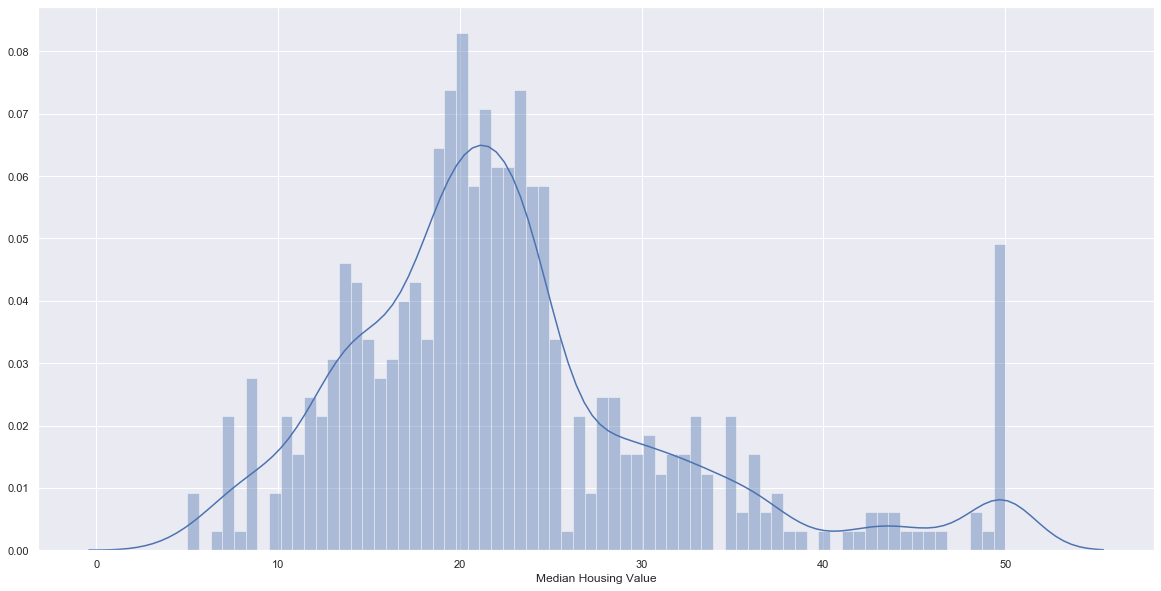

In [24]:
# visiualise the overall shape of the data. Again it has a positive skew
sns.set(rc={'figure.figsize':(20,10)})
x = pd.Series(boston['MEDV'], name="Median Housing Value")
ax = sns.distplot(x, bins=70, color='b')

In [25]:
target = 'MEDV'

In [84]:
from keras import Sequential
from keras.layers import Dense

#build our model
m = kr.models.Sequential()

m.add(kr.layers.Dense(5, input_dim=6, activation='tanh'))
m.add(kr.layers.Dense(10, activation='linear'))
m.add(kr.layers.Dense(20, activation='linear'))
m.add(kr.layers.Dense(30, activation='linear'))
m.add(kr.layers.Dense(50, activation='linear'))
m.add(kr.layers.Dense(20, activation='linear'))
m.add(kr.layers.Dense(10, activation='linear'))
m.add(kr.layers.Dense(5, activation='linear'))
m.add(kr.layers.Dense(1, activation='linear'))

m.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [85]:
x = boston.drop(target, axis=1).values
y = boston[[target]].values

In [87]:
m.fit(x, y,epochs=100, batch_size=10)

Epoch 1/100
506/506 [==============================] - 0s 177us/step - loss: 26.7103 - accuracy: 0.0079
Epoch 2/100
506/506 [==============================] - 0s 162us/step - loss: 27.1241 - accuracy: 0.0138
Epoch 3/100
506/506 [==============================] - 0s 158us/step - loss: 26.5228 - accuracy: 0.0099
Epoch 4/100
506/506 [==============================] - 0s 160us/step - loss: 30.0713 - accuracy: 0.0079
Epoch 5/100
506/506 [==============================] - 0s 160us/step - loss: 26.1952 - accuracy: 0.0178
Epoch 6/100
506/506 [==============================] - 0s 160us/step - loss: 26.9112 - accuracy: 0.0099
Epoch 7/100
506/506 [==============================] - 0s 160us/step - loss: 26.9157 - accuracy: 0.0099
Epoch 8/100
506/506 [==============================] - 0s 158us/step - loss: 27.1321 - accuracy: 0.0059
Epoch 9/100
506/506 [==============================] - 0s 170us/step - loss: 26.5338 - accuracy: 0.0020
Epoch 10/100
506/506 [==============================] - 0s 162us

506/506 [==============================] - 0s 150us/step - loss: 26.4695 - accuracy: 0.0198
Epoch 80/100
506/506 [==============================] - 0s 197us/step - loss: 25.0782 - accuracy: 0.0119
Epoch 81/100
506/506 [==============================] - 0s 179us/step - loss: 26.1547 - accuracy: 0.0138
Epoch 82/100
506/506 [==============================] - 0s 175us/step - loss: 25.1735 - accuracy: 0.0079
Epoch 83/100
506/506 [==============================] - 0s 152us/step - loss: 26.0344 - accuracy: 0.0178
Epoch 84/100
506/506 [==============================] - 0s 144us/step - loss: 26.4195 - accuracy: 0.0138
Epoch 85/100
506/506 [==============================] - 0s 154us/step - loss: 25.2685 - accuracy: 0.0099
Epoch 86/100
506/506 [==============================] - 0s 150us/step - loss: 24.9472 - accuracy: 0.0158
Epoch 87/100
506/506 [==============================] - 0s 152us/step - loss: 24.6754 - accuracy: 0.0138
Epoch 88/100
506/506 [==============================] - 0s 152us/ste

In [88]:
p = m.predict(x)

In [89]:
prediction_output = pd.DataFrame(p, columns=['P_MEDV'])
prediction_output

,P_MEDV
0,26.811174
1,23.193377
2,31.648792
3,33.711052
4,27.125721
...,...
501,26.295925
502,27.505180
503,33.246452
504,31.438242


In [90]:
output = pd.concat([boston, prediction_output], axis=1)

In [91]:
output

,CRIM,ZN,CHAS,DIS,RAD,LSTAT,MEDV,P_MEDV
0,0.00632,18.0,0.0,4.0900,1.0,4.98,24.0,26.811174
1,0.02731,0.0,0.0,4.9671,2.0,9.14,21.6,23.193377
2,0.02729,0.0,0.0,4.9671,2.0,4.03,34.7,31.648792
3,0.03237,0.0,0.0,6.0622,3.0,2.94,33.4,33.711052
4,0.06905,0.0,0.0,6.0622,3.0,5.33,36.2,27.125721
...,...,...,...,...,...,...,...,...
501,0.06263,0.0,0.0,2.4786,1.0,9.67,22.4,26.295925
502,0.04527,0.0,0.0,2.2875,1.0,9.08,20.6,27.505180
503,0.06076,0.0,0.0,2.1675,1.0,5.64,23.9,33.246452
504,0.10959,0.0,0.0,2.3889,1.0,6.48,22.0,31.438242


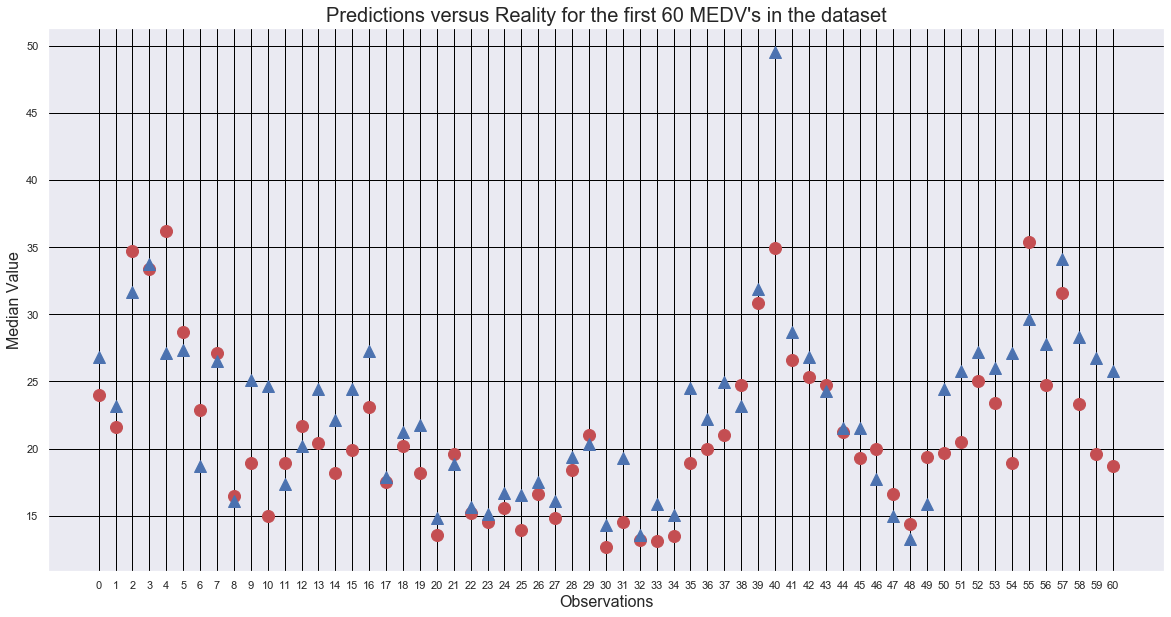

In [92]:
B_MEDV = output.loc[:60, 'MEDV'] 
P_MEDV = output.loc[:60, 'P_MEDV'] 

plt.plot(B_MEDV, color='r', marker='o', markersize=12, linestyle='')
plt.plot(P_MEDV, color='b', marker='^', markersize=12, linestyle='')
plt.grid(color='black', linestyle='-', linewidth=1)
plt.xlabel("Observations", fontsize=16)
plt.ylabel("Median Value", fontsize=16)
plt.title("Predictions versus Reality for the first 60 MEDV's in the dataset", fontsize=20)

plt.xticks(np.arange(0, 61, step=1))
plt.show()

### References
https://www.kaggle.com/ffisegydd/sklearn-multicollinearity-class

https://blog.datarobot.com/ordinary-least-squares-in-python

https://pythonfordatascience.org/anova-python/#data

https://en.wikipedia.org/wiki/Ordinary_least_squares

https://stackoverflow.com/questions/49473757/python-degrees-of-freedom

https://medium.com/@robertjohn_15390/simple-housing-price-prediction-using-neural-networks-with-tensorflow-8b486d3db3ca

(1997) The problem of multicollinearity. In: Understanding Regression Analysis. Springer, Boston, MA

https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

https://medium.com/@amitg0161/sklearn-linear-regression-tutorial-with-boston-house-dataset-cde74afd460a

https://www.kaggle.com/prasadperera/the-boston-housing-dataset

Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

https://keras.rstudio.com/articles/tutorial_basic_regression.html

https://github.com/topics/boston-housing-price-prediction?o=desc&s=updated